# step1:Business problem understanding

**Educational institutions and tutoring centers aim to identify key factors influencing students' academic performance and develop targeted intervention strategies to improve outcomes. The goal is to understand the impact of various activities, study patterns, and previous scores on a student's performance index and provide personalized recommendations to optimize their learning strategies.**



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV


# Step2-Data Understanding

**#load data and understand every variable**

In [95]:
df=pd.read_excel("C:\\Users\\Pooja\\cleaned_data_MLR_student_performance.xlsx")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9868,1,49,1,4,2,23
9869,7,64,1,8,5,58
9870,6,83,1,8,5,74
9871,9,97,1,7,0,95


**X & Y**

In [32]:
x=df.drop("Performance Index",axis=1)

y=df["Performance Index"]

In [33]:
train = []
test = []
cv = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = i)
    
    from sklearn.linear_model import LinearRegression
    l = LinearRegression()
    l.fit(x_train,y_train)
    
    train_score = l.score(x_train,y_train)
    test_score = l.score(x_test,y_test)
    
    train.append(train_score)
    test.append(test_score)
    
#     y_pred_train = l.predict(x_train,y_train)
#     y_pred_test = l.predict(x_test,y_test)
    
#     train.append(l.score(y_pred_train))
#     test.append(l.score(y_pred_test))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="r2").mean())
    
em = pd.DataFrame({"train":train,"test":test,"cv":cv})
gm = em[(abs(em["train"]-em["test"])<=0.05)&(abs(em["test"]-em["cv"])<=0.05)]
print("best_random_number:",gm[gm["cv"]==gm["cv"].max()].index.to_list()[0])

best_random_number: 59


**Train test split**

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=59)

# Algorithm-1 : Linear Regression

# Step-3-4 :Modelling


In [35]:
#modelling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -34.07573875896979
Coefficients: [2.85743588 1.01813537 0.60529577 0.48158535 0.19052559]


# step-5 : Evaluation Metrics

**calculet train accuracy or train RMSC**

**-calculet cross validation score on train data**

**-calculet test accuracy or test RMSC**


In [36]:
#prediction on train data
ypred_train=model.predict(x_train)

#evaluation
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))

from sklearn.metrics import r2_score
print("train R2:",r2_score(y_train,ypred_train))


Train RMSE: 2.026590682816714
train R2: 0.9889659420555772


**check whether test accuaracy==cross validation score**

In [37]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,x,y,cv=5).mean())

Cross Validation Score: 0.9886613898881287


In [38]:
#prediction
ypred_test=model.predict(x_test)

#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test R2:",r2_score(y_test,ypred_test))

Test RMSE: 2.110093112895321
test R2: 0.9874838956547463


# Model selection

**1.checklist : 1-check whether model is good or either having overfitting** 

**underfitting problem**

**2.cheklist : 2-whether the Test Accuracy =Cross validation score**

**3.cheklist : 3-check wheher ,it satisfies the business problem requirenment**

**check for assumptions**

**1.Linear of Error**

In [39]:
test_res = y_test - ypred_test

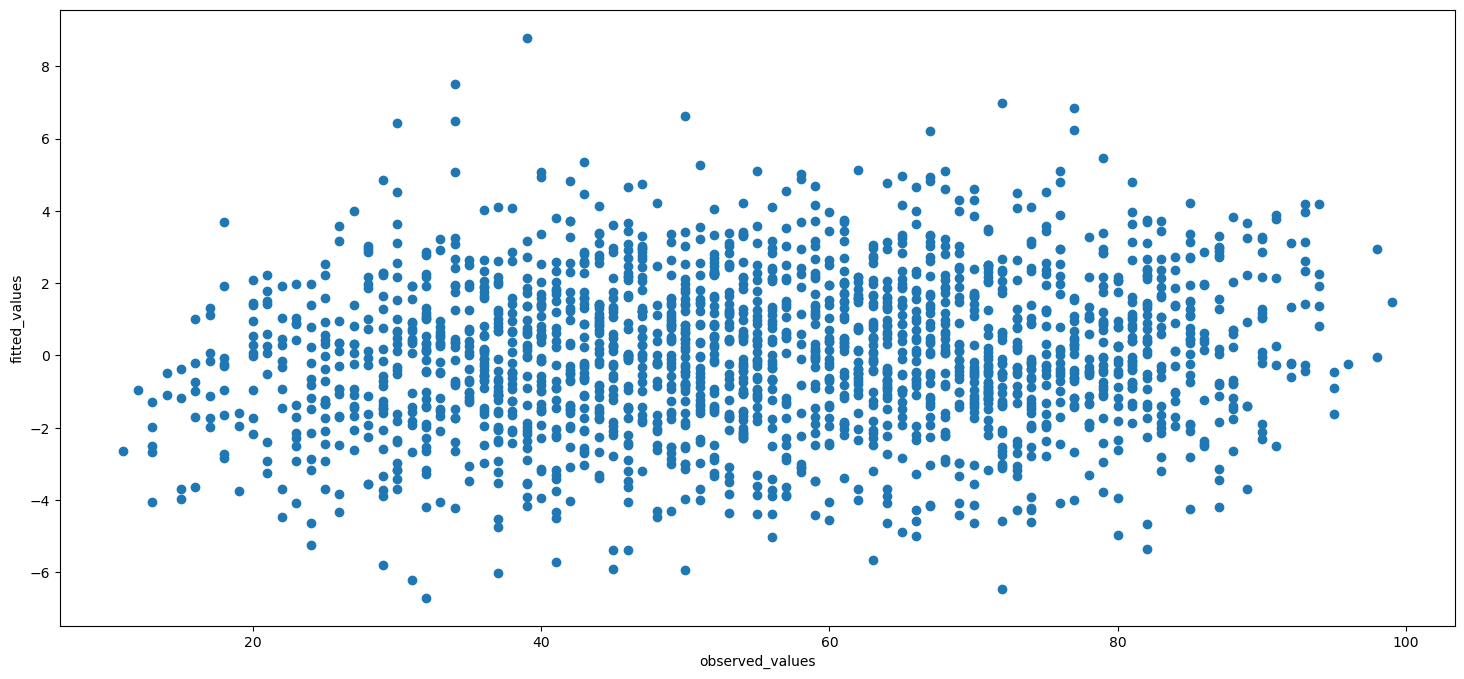

In [40]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2 Normality of Errors**"

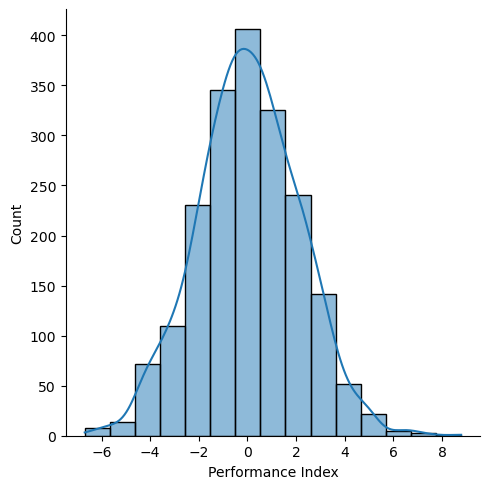

In [41]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

**3.Equal Variance of Errors**

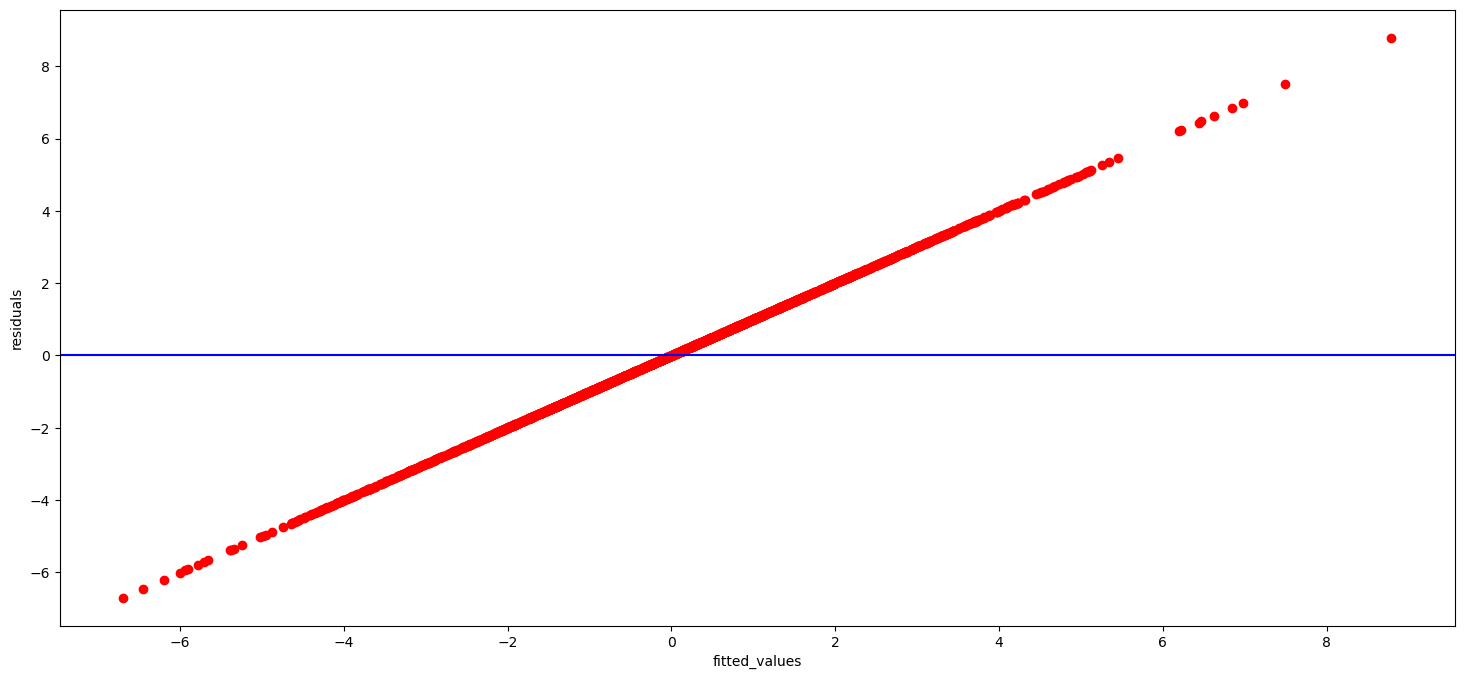

In [42]:
plt.scatter(test_res,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [43]:
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:35:58   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.0689      0.128   -265.875      0.000     -34.320     -33.818
x[0]           2.8527      0.008    358.940      0.000       2.837       2.868
x[1]           1.0183      0.001    857.427      0.000       1.016       1.021
x[2]           0.6167      0.041     14.981      0.000       0.536       0.697
x[3]           0.4803      0.012     39.623      0.000       0.457       0.504
x[4]           0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**# added variable plot (AV Plot)**

**partial variable instad of normal differention**

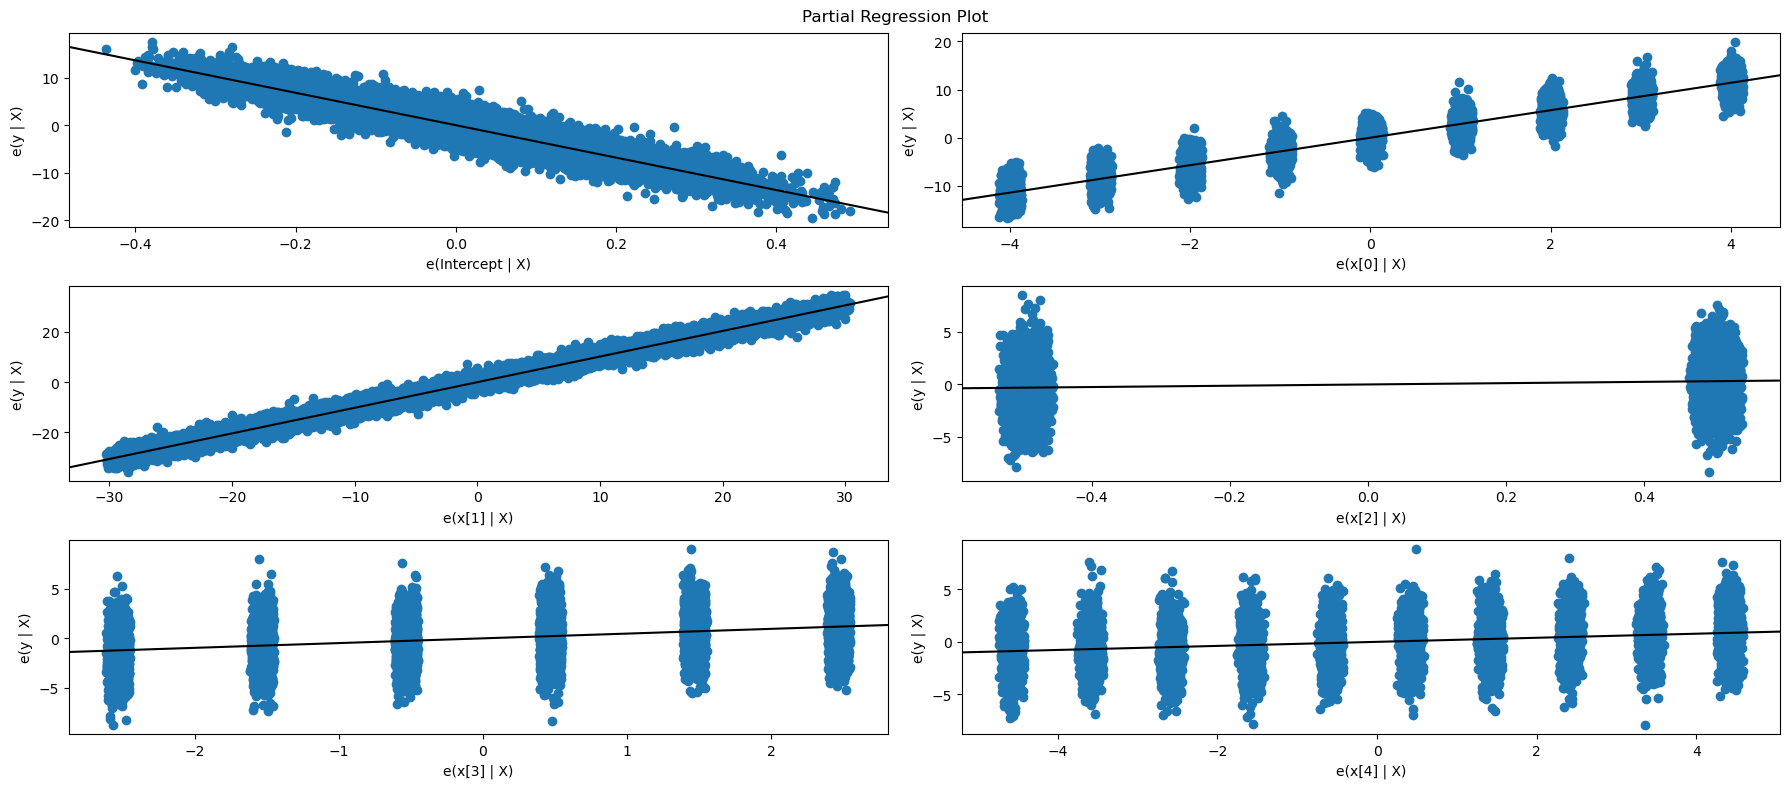

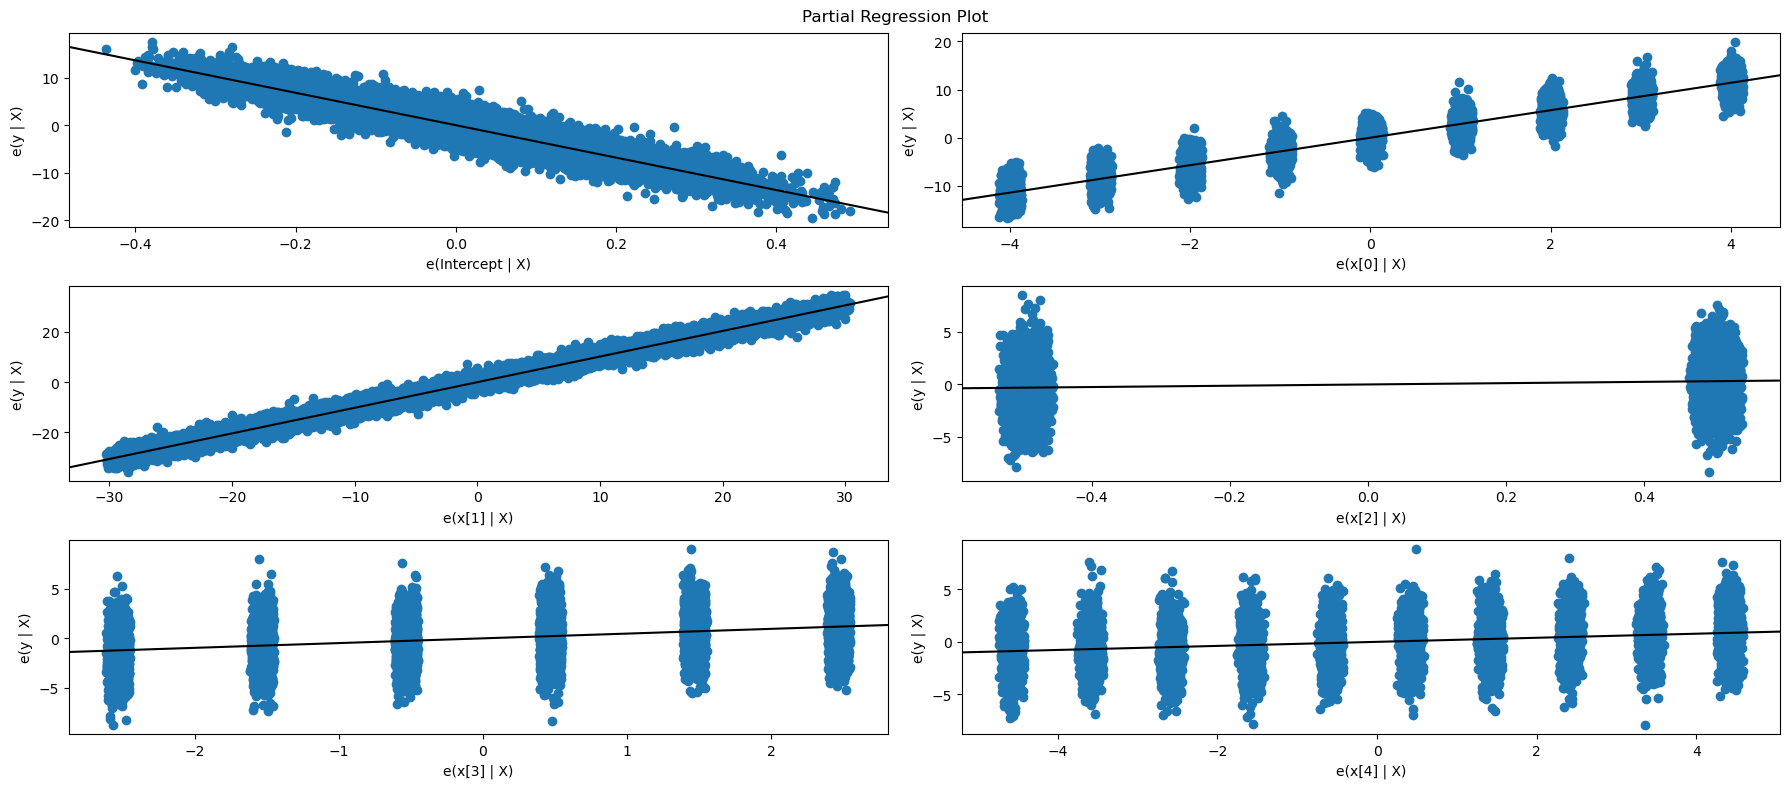

In [44]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

In [45]:
# this model is bad model

# Algorithm -2 : Non Linear Regresssion 

# Step-4 : Modelling-Polynomial Regression

In [46]:
#data preprocessing on train data
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2)
x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))

#modeling on train data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_poly,y_train)

#prediction on train data
ypred_train=model.predict(x_train_poly)

#evaluation on train data
from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSC:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2:",r2_score(y_train,ypred_train))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(model,x_train_poly,y_train,cv=5,scoring="r2").mean())

Train RMSC: 2.025190349054884
Train R2: 0.9889811854154805
CV Score: 0.988903342442437


In [47]:
#data preprocessing on test data
x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))
#prediction on test data
ypred_test=model.predict(x_test_poly)

#evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test R2:",r2_score(y_test,ypred_test))

Test RMSE: 2.111560339235407
test R2: 0.987466483776161


**Comarison with linear Regression**

**Hyperparameter tuning**

**Choosing the best polynomial degree of given dataset**


In [48]:
train_r2=[]
test_r2=[]

for i in range(1,10):
    #preprocessing
    polynomial_converter=PolynomialFeatures(degree=i) 
    x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
    
    #modeling
    model=LinearRegression()
    model.fit(x_train_poly,y_train)
    
    #prediction & evaluation on train data
    train_pred=model.predict(x_train_poly)
    train_r2.append(model.score(x_train_poly,y_train))
    
    #transformation on test data
    x_test_poly = pd.DataFrame(polynomial_converter.transform(x_test))
    
    
    #prediction & evaluation on train data
    test_pred = model.predict(x_test_poly)
    test_r2.append(model.score(x_test_poly,y_test))

In [49]:
train_r2

[0.9889659420555772,
 0.9889811854154805,
 0.9890341756863936,
 0.9890936595021397,
 0.9892055370213004,
 0.9894199386994923,
 0.9896088450783398,
 0.9897312404469388,
 0.990149189862272]

In [50]:
test_r2

[0.9874838956547463,
 0.987466483776161,
 0.987427482359376,
 0.987341053251928,
 0.9871358825498617,
 0.9869493258019882,
 0.9865529318977265,
 0.9859918780788471,
 0.9860761033413139]

**Final polynomial model with best parameter**

In [51]:
#preprocessing
final_poly_converter=PolynomialFeatures(degree=1)
x_train_poly=pd.DataFrame(final_poly_converter.fit_transform(x_train))

#build the final model
final_model = LinearRegression()
final_model.fit(x_train_poly,y_train)

#prediction & evaluation on train data
train_pred = final_model.predict(x_train_poly)
print("Train R2:",final_model.score(x_train_poly,y_train))
print("cross Validation Score:",cross_val_score(model,x_train_poly,y_train,cv=5).mean())

#preprocessing + prediction + evaluation on test data
x_test_poly =pd.DataFrame(final_poly_converter.transform(x_test))
test_pred = final_model.predict(x_test_poly)
print("Test R2:",final_model.score(x_test_poly,y_test))

Train R2: 0.9889659420555772
cross Validation Score: 0.9889367484893729
Test R2: 0.9874838956547463


**check for assumptions**


**1.Linear of Error**


In [52]:
test_res =y_test - ypred_test

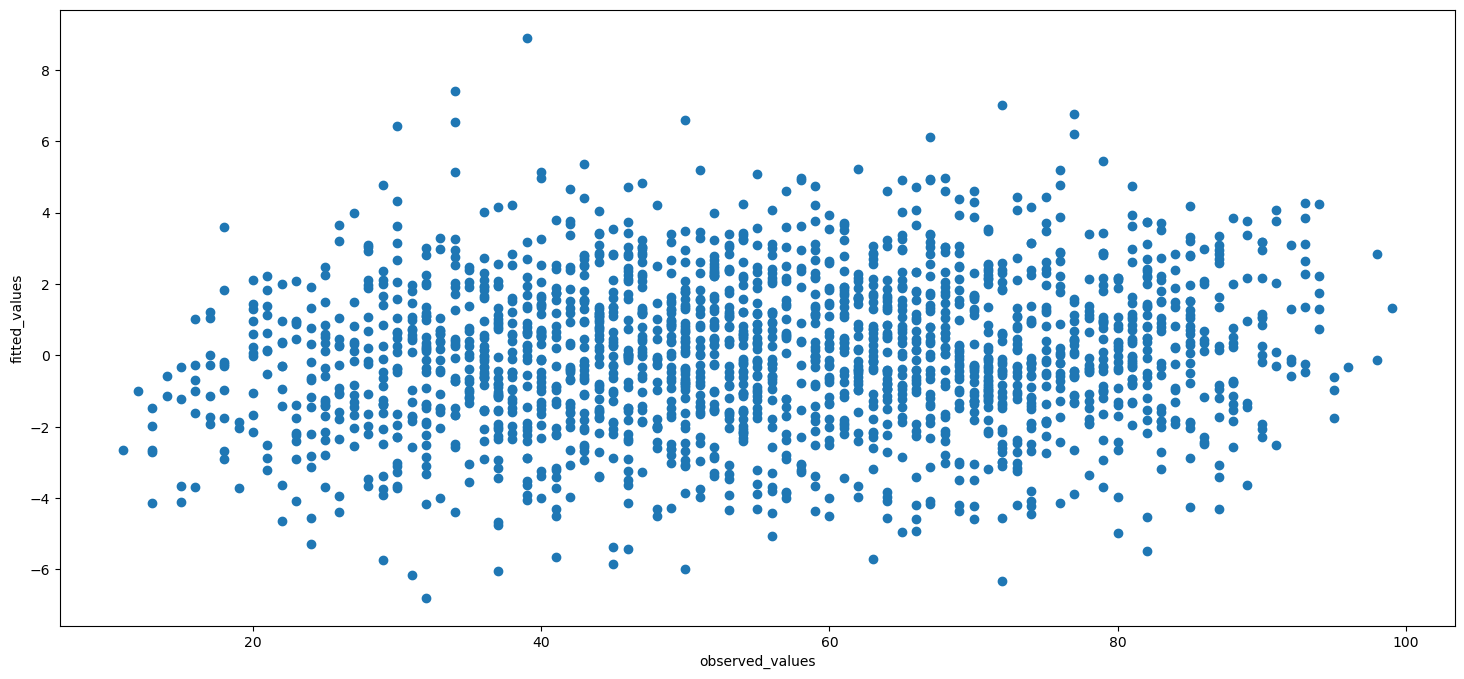

In [53]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2 Normality of Errors**

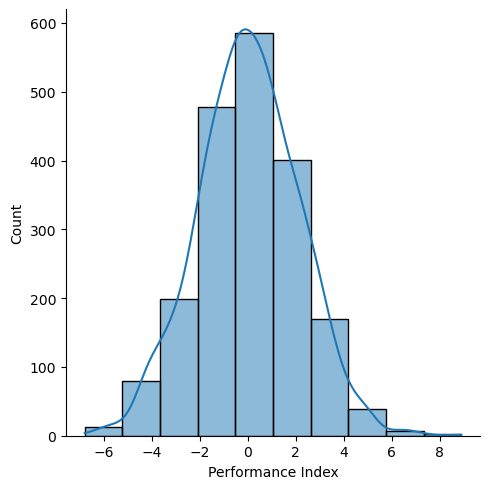

In [54]:
sns.displot(test_res,bins=10,kde=True)
plt.show()

**3.Equal Variance of Errors**

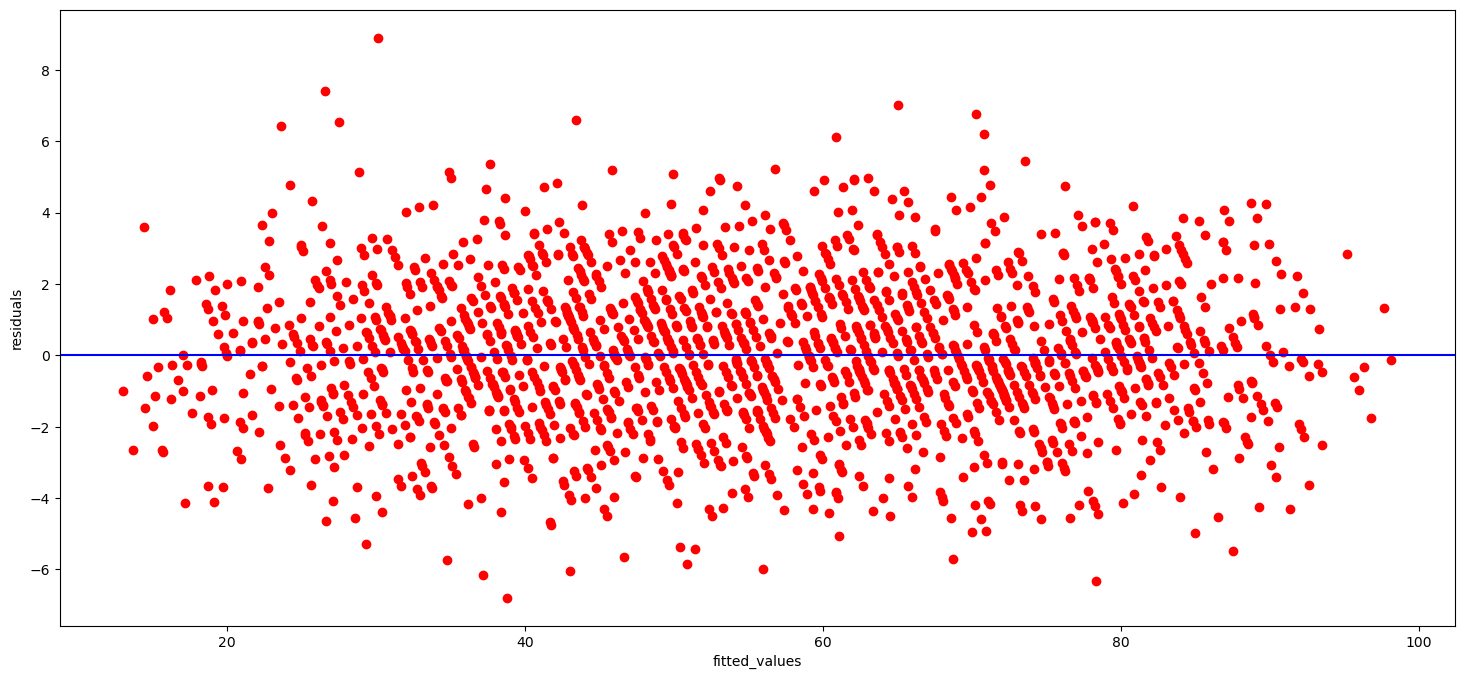

In [55]:
plt.scatter(ypred_test,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [56]:
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:37:16   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.0689      0.128   -265.875      0.000     -34.320     -33.818
x[0]           2.8527      0.008    358.940      0.000       2.837       2.868
x[1]           1.0183      0.001    857.427      0.000       1.016       1.021
x[2]           0.6167      0.041     14.981      0.000       0.536       0.697
x[3]           0.4803      0.012     39.623      0.000       0.457       0.504
x[4]           0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**# added variable plot (AV Plot)**

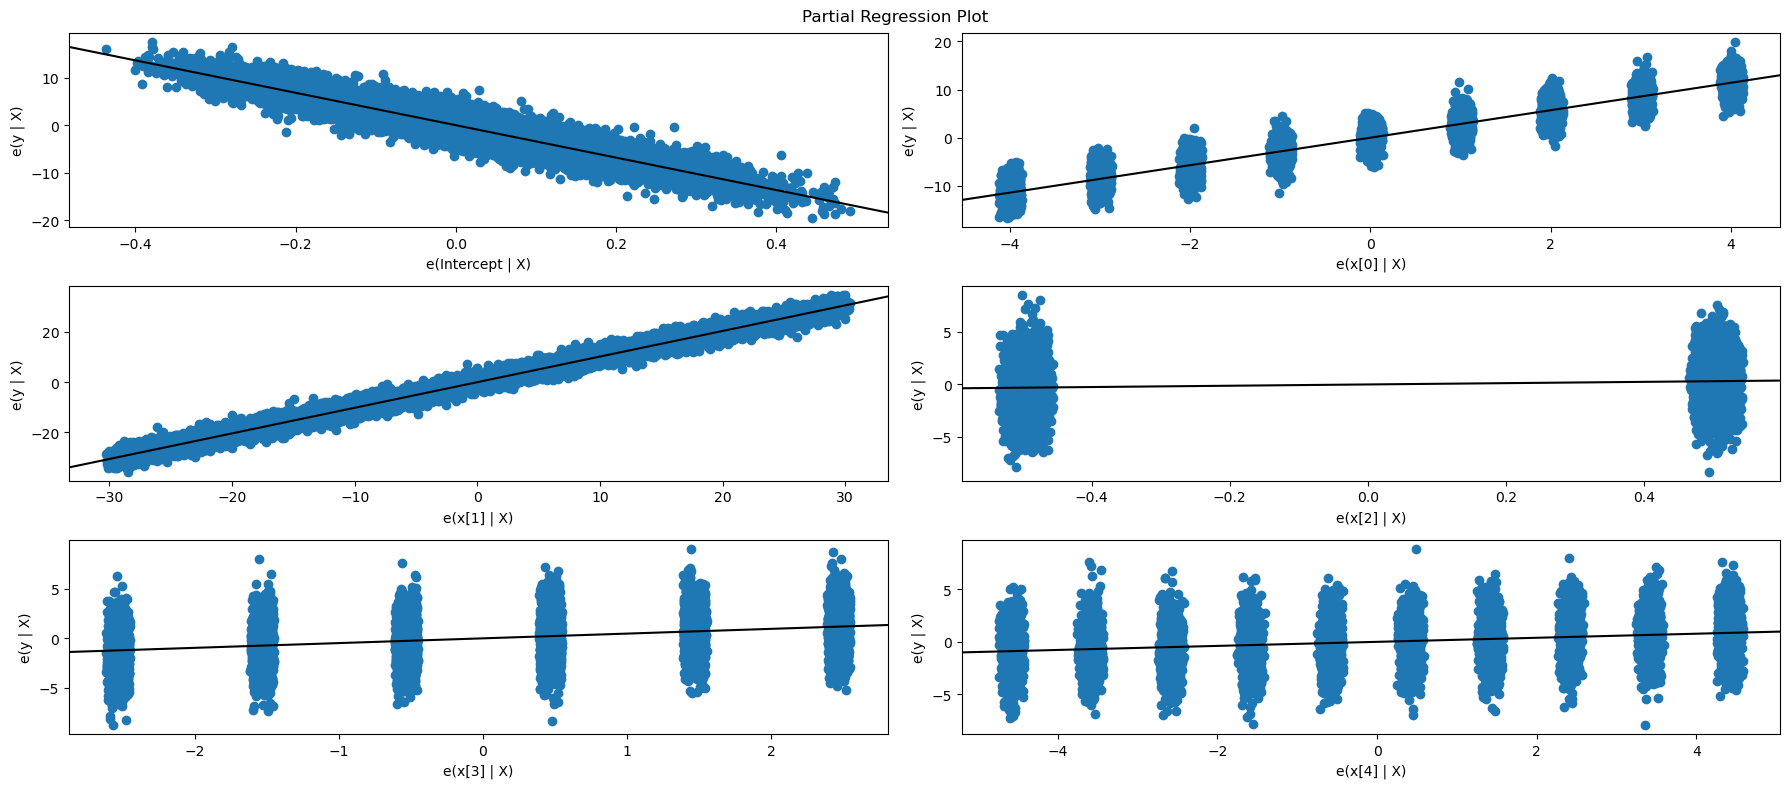

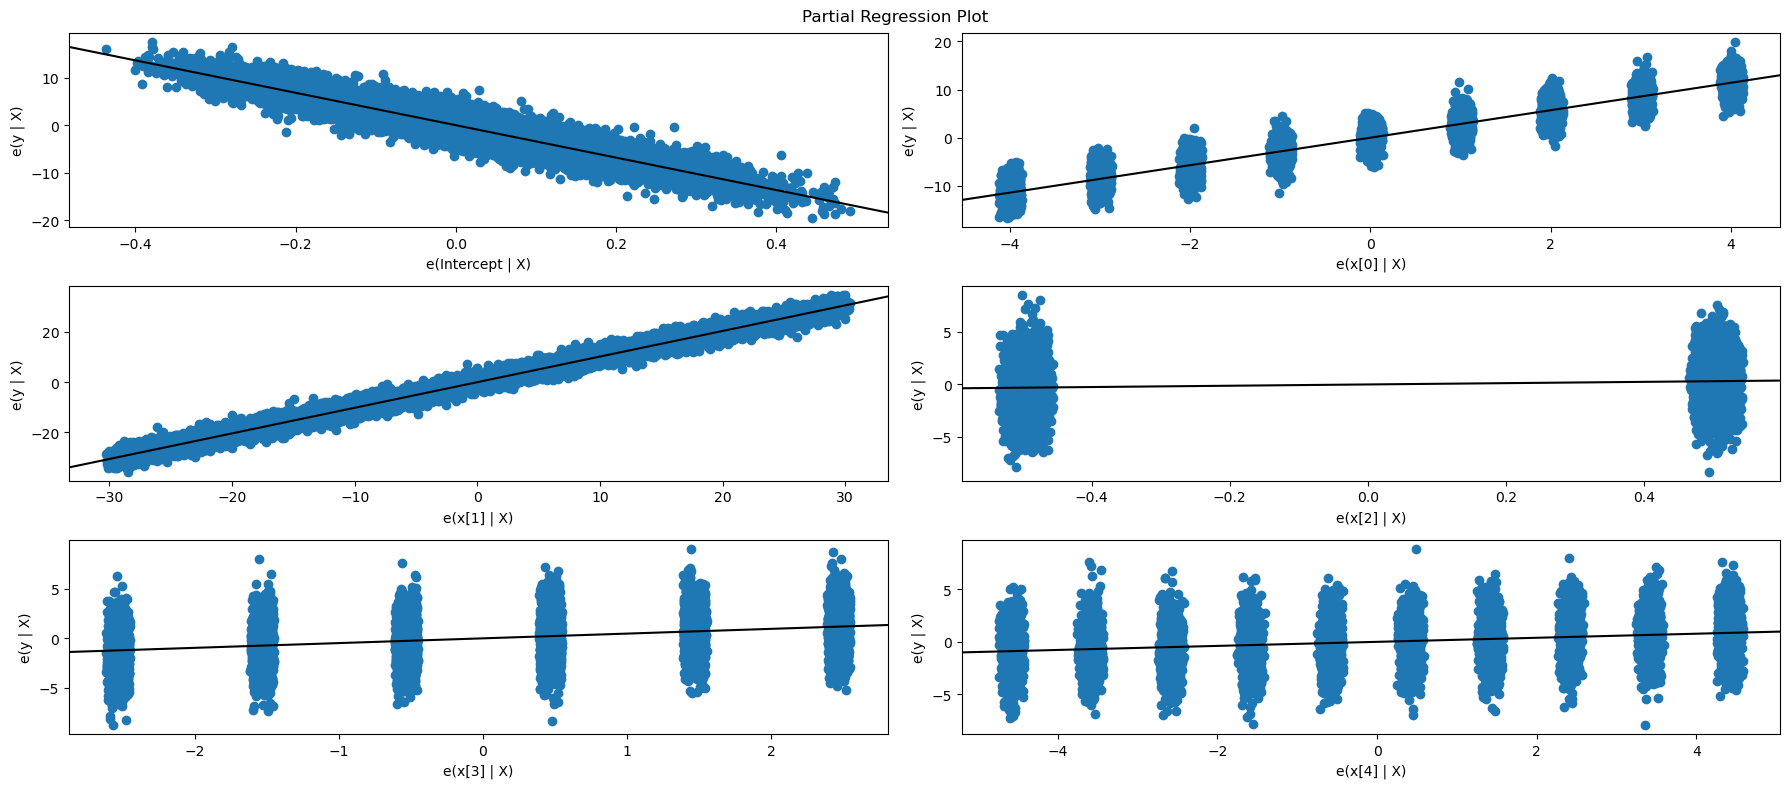

In [57]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

# Algorithm-3 : Lasso regression

# Step-4,5:Modelling & Evaluation

**Applying Hyperparameter tuning for lasso regression**

In [58]:
from sklearn.model_selection import GridSearchCV

#model
from sklearn.linear_model import Lasso
estimator=Lasso()

#parameter & values
param_grid={"alpha":list(range(1,600))}

#identifying the best value of the parameter within given values for the given data
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(x_train,y_train)

model_hp.best_params_

{'alpha': 1}

**build lasso model using best hyperparameter**

**build lasso model using best hyperparameter**

In [59]:
# modelling
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=1)
lasso_best.fit(x_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coeficients:",lasso_best.coef_)

#prdiction & evaluation on train data
ypred_train=lasso_best.predict(x_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV score:",cross_val_score(lasso_best,x_train,y_train,cv=5).mean())

#prediction & evaluation on test data
ypred_test=lasso_best.predict(x_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -30.047166700850383
coeficients: [2.71226564 1.01531755 0.         0.13210817 0.07481932]
Train R2: 0.9870805630677926
CV score: 0.9870428886067553
Test R2: 0.98555571705313


# Final model

In [60]:
x=x.drop("Extracurricular Activities",axis=1)
y=df["Performance Index"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=59)

# modelling
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=1)
lasso_best.fit(x_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coeficients:",lasso_best.coef_)

#prdiction & evaluation on train data
ypred_train=lasso_best.predict(x_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("CV score:",cross_val_score(lasso_best,x_train,y_train,cv=5).mean())

#prediction & evaluation on test data
ypred_test=lasso_best.predict(x_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -30.047166700850383
coeficients: [2.71226564 1.01531755 0.13210817 0.07481932]
Train R2: 0.9870805630677926
CV score: 0.9870428886067553
Test R2: 0.98555571705313


In [61]:
#  Prediction on new Data

In [62]:
input_data={"Hours Studied":7,"Previous Scores":99,"Extracurricular Activities":1,
            "Sleep Hours":9,"Sample Question Papers Practiced":1	}

In [63]:
df_test=pd.DataFrame(input_data,index=[0])
df_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1


**preprocessing the data**

In [64]:
df_test.drop(["Extracurricular Activities"],axis=1,inplace=True)

**predict**

In [65]:
lasso_best.predict(df_test)

array([90.7189229])

# Algorithm-4 : Ridge Regression

In [66]:
#Model
estimator=Ridge()

#parameter & value
param_grid={"alpha":list(range(1,10))}

#identifing the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 3}

**build Ridge model using best hyperparameter**

In [67]:
ridge_best = Ridge(alpha=5)
ridge_best.fit(x_train,y_train)

print("Intercept:",ridge_best.intercept_)
print("coefficients:",ridge_best.coef_)

Intercept: -33.75431145390954
coefficients: [2.85815141 1.01821595 0.47559769 0.19248177]


# step - 5 : Evaluation

**evaluation on train data**

In [68]:
ypred_train = ridge_best.predict(x_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("cv score:",cross_val_score(ridge_best,x_train,y_train,cv=5).mean())


Train R2: 0.9887202487017168
cv score: 0.9886924343407184


#**Evaluation on test data**

In [69]:
ypred_test = ridge_best.predict(x_test)
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.9871779500955413


#  Predict on unkown data

**data**

In [79]:
input_data={"Hours Studied":7,
            "Previous Scores":99,
            "Extracurricular Activities":1,
            "Sleep Hours":9,
            "Sample Question Papers Practiced":1}

In [80]:
df_test=pd.DataFrame(input_data,index=[0])
df_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1


In [82]:
df_test.drop(["Extracurricular Activities"],axis=1,inplace=True)

**predict**

In [83]:
ridge_best.predict(df_test)

array([91.52898808])

#  Step-4 : Modelling & eavaluation

**Lasso Regression with default parameters**

In [84]:
#Modelling
from sklearn.linear_model import ElasticNet
enr_base = ElasticNet()
enr_base.fit(x_train,y_train)

#prediction
train_predictions = enr_base.predict(x_train)
test_predictions = enr_base.predict(x_test)

#evaluation
print("Train R2:",enr_base.score(x_train,y_train))
print("Test R2:",enr_base.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross validation score:",cross_val_score(enr_base,x,y,cv=5).mean())

Train R2: 0.9869659282345374
Test R2: 0.9855760027713973
cross validation score: 0.9866233498473369


**applying Hyperparameter tuning for lasso regression**

In [85]:
from sklearn.model_selection import GridSearchCV

#model
estimator = ElasticNet()

#parameters & values
param_grid ={"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0.1,0.5,0.75,0.9,0.95,1]}

#identifying the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="neg_mean_squared_error")
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

**Rebuilt Lasso a model using best hyperparameters**

In [86]:
#Modelling
enr_best =ElasticNet(alpha=0.1,l1_ratio=0.1)
enr_best.fit(x_train,y_train)

print("Intercept:",enr_best.intercept_)
print("coefficients:",enr_best.coef_)

#predictions
train_predictions= enr_best.predict(x_train)
test_predicts=enr_best.predict(x_test)

#evaluation
print("Train R2:",enr_best.score(x_train,y_train))
print("Test R2:",enr_best.score(x_test,y_test))
print("cross validation score:",cross_val_score(enr_best,x,y,cv=5).mean())

Intercept: -33.41345370645844
coefficients: [2.81915465 1.01789887 0.45818854 0.18995641]
Train R2: 0.9886897468256282
Test R2: 0.9871806407814749
cross validation score: 0.9883724824762348


# Prediction on New Data

In [87]:
df_test=pd.DataFrame(input_data,index=[0])

In [88]:
df_test=pd.DataFrame(input_data,index=[0])
df_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1


In [91]:
df_test.drop(["Extracurricular Activities"],axis=1,inplace=True)

**preprocessing the data**

In [92]:
enr_best.predict(df_test)

array([91.40626973])

 # In all algorithm ElasticNet is giving best accuracy so ElacticNet is best model for Student performance prediction 